In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./data/winequality-red.csv')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:,'quality'] = df.quality.map(quality_mapping)

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=7)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [9]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
                df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
                df_test.quality, test_predictions)

print(train_accuracy)
print(test_accuracy)

0.791
0.5459098497495827


### let us plot accuracy plot for different values of max_depth

In [10]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [11]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [12]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    
    
    clf.fit(df_train[cols],df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
                    df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
                    df_test.quality, test_predictions
    )
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    


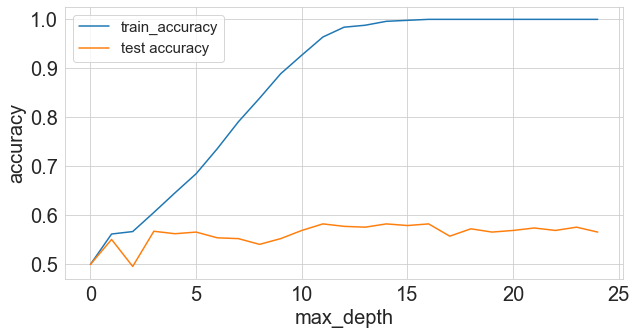

In [13]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label = 'test accuracy')
plt.legend(loc = 'upper left', prop = {'size':15})
plt.xticks(range(0,26,5))
plt.ylabel('accuracy',size = 20)
plt.xlabel('max_depth',size = 20)
plt.show()

### KFold validation

In [14]:
from sklearn import model_selection

df=pd.read_csv('./data/winequality-red.csv')

df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop = True)

kf = model_selection.KFold(n_splits=5)

for fold,(trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [15]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
1566,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,6,4
1484,6.8,0.410,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6,4
48,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,6,0
127,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,0
562,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6,1


### Stratified KFold validation

In [16]:
from sklearn import model_selection

df=pd.read_csv('./data/winequality-red.csv')

df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop = True)

kf = model_selection.StratifiedKFold(n_splits=5)

for fold,(trn_, val_) in enumerate(kf.split(X=df , y =df.quality)):
    df.loc[val_, 'kfold'] = fold

In [19]:
##distribution of target variable

Text(0, 0.5, 'count')

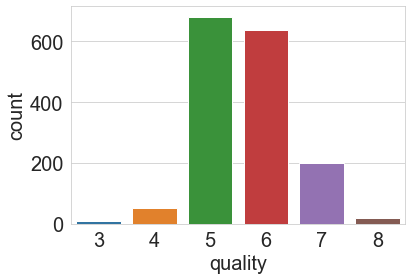

In [20]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality',fontsize=20)
b.set_ylabel('count',fontsize=20)

### Stratified K fold for regression

In [61]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [62]:
def create_folds(data):
    data['kfold'] = -1

    # randomize the no of rows of data
    data = data.sample(frac = 1).reset_index(drop = True)

    num_bins = int(np.floor(1+ np.log2(len(data))))

    data.loc[:, 'bins'] = pd.cut(data['target'],
                                bins = num_bins, labels = False)

    kf = model_selection.StratifiedKFold(n_splits = 5)

    for f,(t_,v_) in enumerate(kf.split(X=data, y = data.bins.values)):
        data.loc[v_,'kfold'] = f

    data = data.drop('bins', axis = 1)
    return data

In [63]:
X, y = datasets.make_regression(
        n_samples = 15000 , n_features = 100 , n_targets = 1)


df = pd.DataFrame(
        X, 
        columns = [f"f_{i}" for i in range(X.shape[1])])
df.loc[:, 'target'] = y

# create folds
df = create_folds(df)

In [64]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.354877,0.204975,-0.894510,-0.054472,0.991322,0.454115,0.931722,-0.065795,0.480396,0.143101,...,-3.289187,0.198585,-0.861744,-0.027619,-0.605181,0.758703,-0.831625,0.013823,-84.886408,0
1,-0.784326,-0.216504,1.578977,-0.708226,0.744072,0.873946,-1.281815,0.256681,-1.699909,0.230102,...,-1.111718,-0.677186,-0.389132,0.458127,-0.020699,1.057331,0.167234,-0.080608,-136.851614,0
2,-0.401086,-1.130719,0.684059,0.468634,0.686906,0.007938,-1.173511,0.144579,-0.399172,-0.173307,...,1.220104,1.106123,1.261524,1.940987,0.315697,0.057211,-1.544149,-1.277388,62.468051,0
3,0.138741,-0.254498,-1.330760,-0.072105,2.439799,-0.977847,2.469071,-0.128493,0.722588,-0.983244,...,0.081807,0.387737,0.657323,-2.160669,1.647320,0.952504,0.696363,-0.423782,118.996415,0
4,-0.597216,-1.982559,-1.500792,0.214497,-0.771283,1.046180,0.030755,-0.087105,1.877055,-0.981566,...,0.126123,-0.410452,-0.540049,-1.140787,-0.387647,-0.388351,0.893332,-1.760298,-84.114917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.181924,-0.186335,2.022322,-0.289100,-0.001948,-1.711815,0.326536,0.702643,0.305188,-0.152759,...,-0.808571,0.310681,0.511904,-1.026386,-1.318761,-0.208098,0.178563,0.490820,96.061625,4
14996,-1.023996,-0.298663,0.883749,1.401886,-1.618184,0.141155,0.036545,1.395322,1.609800,0.078840,...,-1.365970,-1.510476,-0.044483,-0.144894,-0.179360,-0.479772,1.200360,-1.098778,274.233220,4
14997,-0.166248,0.568253,0.020892,0.735249,0.054346,0.615484,-0.011856,2.036064,0.377433,1.917581,...,-0.624752,2.428715,-0.371577,-0.716345,0.015056,-0.761902,-1.215046,1.123984,291.774706,4
14998,0.223604,0.827169,-0.847442,-2.576070,-1.868423,-0.916199,-0.503611,1.278437,0.097154,-1.022417,...,-1.292871,0.345845,-0.463336,0.853340,0.794287,-0.628042,-0.450652,-0.838671,-0.267911,4
